In [16]:
## 필요모듈 
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.applications import VGG16

In [10]:
file_list = glob('train/*.jpg')

In [12]:
## 파일 만들기
X = np.zeros((len(file_list),150,150,3))
y = []
for idx, file in enumerate(file_list):
    tmp = cv2.imread(file)
    tmp = cv2.resize(tmp,(150,150))
    X[idx] = tmp
    if 'cat' in file:
        y.append(0)
    else:
        y.append(1)
y = np.array(y).reshape(-1,1)

In [13]:
idx = np.random.choice(np.arange(4000),4000,replace=False)

In [14]:
X = X[idx]
y = y[idx]
X_train = X[:3200]
y_train = y[:3200]
X_test = X[3200:]
y_test = y[3200:]

In [17]:
pre_conv = VGG16(include_top=False,
                 input_shape=(150,150,3))

In [18]:
model = Sequential(
    [
        Flatten(),
        Dense(256,activation='relu'),
        Dense(1,activation='sigmoid')
    ]
)

In [19]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

In [20]:
X_train = pre_conv.predict(X_train)
model.fit(
    X_train,
    y_train,
    epochs=20
)

100/100 [==============================] - 149s 1s/step
Epoch 1/20
100/100 [==============================] - 2s 11ms/step - loss: 4.1153 - accuracy: 0.9109
Epoch 2/20
100/100 [==============================] - 1s 11ms/step - loss: 0.3555 - accuracy: 0.9631
Epoch 3/20
100/100 [==============================] - 1s 11ms/step - loss: 0.1701 - accuracy: 0.9794
Epoch 4/20
100/100 [==============================] - 1s 11ms/step - loss: 0.0556 - accuracy: 0.9900
Epoch 5/20
100/100 [==============================] - 1s 11ms/step - loss: 0.0571 - accuracy: 0.9919
Epoch 6/20
100/100 [==============================] - 1s 11ms/step - loss: 0.0095 - accuracy: 0.9972
Epoch 7/20
100/100 [==============================] - 1s 11ms/step - loss: 0.0744 - accuracy: 0.9937
Epoch 8/20
100/100 [==============================] - 1s 11ms/step - loss: 0.0222 - accuracy: 0.9984
Epoch 9/20
100/100 [==============================] - 1s 11ms/step - loss: 0.0165 - accuracy: 0.9978
Epoch 10/20
100/100 [==============

In [25]:
#############################################

In [31]:
def image_predict(x):
    dt = cv2.imread(x)
    plt.imshow(dt)
    plt.show()
    dt = cv2.resize(dt,(150,150))
    dt = dt.reshape(1,150,150,3)
    dt = pre_conv.predict(dt)
    return np.where(model.predict(dt) >0.5,'강아지','고양이')[0]

In [32]:
x = plt.imread('1.jpg')

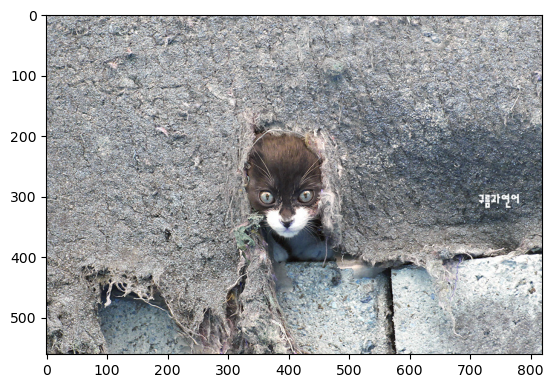

1/1 [==============================] - 0s 20ms/step


array(['강아지'], dtype='<U3')

In [33]:
image_predict('1.jpg')

In [34]:
# ####################################################################################################

In [38]:
Conv2D(filters=64,
      kernel_size=(3,3),
      strides=(1,1),
      padding='same',
      activation='relu')
MaxPooling2D(pool_size=(2,2),strides=(2,2))

In [42]:
pre_conv.get_config()['layers'][4]

{'class_name': 'Conv2D',
 'config': {'name': 'block2_conv1',
  'trainable': True,
  'dtype': 'float32',
  'filters': 128,
  'kernel_size': (3, 3),
  'strides': (1, 1),
  'padding': 'same',
  'data_format': 'channels_last',
  'dilation_rate': (1, 1),
  'groups': 1,
  'activation': 'relu',
  'use_bias': True,
  'kernel_initializer': {'class_name': 'GlorotUniform',
   'config': {'seed': None}},
  'bias_initializer': {'class_name': 'Zeros', 'config': {}},
  'kernel_regularizer': None,
  'bias_regularizer': None,
  'activity_regularizer': None,
  'kernel_constraint': None,
  'bias_constraint': None},
 'name': 'block2_conv1',
 'inbound_nodes': [[['block1_pool', 0, 0, {}]]]}

In [43]:
pre_conv.get_config()['layers']
cat_dog_model = Sequential(
    [
        Conv2D(filters=64,
               kernel_size=(3,3),
               strides=(1,1),
               padding='same',
               activation='relu',
               input_shape=(150,150,3)),
        Conv2D(filters=64,
               kernel_size=(3,3),
              strides=(1,1),
              padding='same',
              activation='relu'),
        MaxPooling2D(pool_size=(2,2),
                     padding='valid',
                     strides=(2,2)),
        Conv2D(128,
               kernel_size=(3,3),
               strides=(1,1),
               padding='same',
               activation='relu'
              )
    ]
)

In [44]:
cat_dog_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
Total params: 112,576
Trainable params: 112,576
Non-trainable params: 0
_________________________________________________________________


In [45]:
# 19층까지 쉽게하는 방법?

In [46]:
from tensorflow.keras.layers import InputLayer

In [48]:
pre_conv.get_config()['layers'][0]

{'class_name': 'InputLayer',
 'config': {'batch_input_shape': (None, 150, 150, 3),
  'dtype': 'float32',
  'sparse': False,
  'ragged': False,
  'name': 'input_1'},
 'name': 'input_1',
 'inbound_nodes': []}

In [56]:
#pre_conv.get_config()['layers'][5]['class_name']
layer_dict = {
    'InputLayer':InputLayer,
    'Conv2D':Conv2D,
    'MaxPooling2D':MaxPooling2D
}
layers = []
for idx in range(len(pre_conv.get_config()['layers'])):
    layer = pre_conv.get_config()['layers'][idx]['class_name']
    param = pre_conv.get_config()['layers'][idx]['config']
    layers.append(layer_dict[layer](**param))

layers.extend([Flatten(),
               Dense(256,activation='relu'),
               Dense(1,activation='sigmoid')
              ])

In [50]:
dog_cat_model = Sequential(layers)

In [57]:
dog_cat_model.layers[19].set_weights(model.layers[1].get_weights())
dog_cat_model.layers[20].set_weights(model.layers[2].get_weights())

In [58]:
model.layers[1].get_weights()[0]

array([[-0.01804507,  0.038981  , -0.0081748 , ...,  0.01159393,
         0.00351161,  0.01555279],
       [ 0.01758917,  0.01373514,  0.01163534, ..., -0.02482226,
         0.00308687, -0.0041622 ],
       [-0.01843236, -0.0241532 ,  0.01442024, ...,  0.01485111,
         0.00487057, -0.02819199],
       ...,
       [-0.01558143,  0.01768565, -0.01161173, ...,  0.02005235,
         0.01507781, -0.00067881],
       [ 0.00128354,  0.01511456,  0.00406357, ...,  0.00177127,
         0.00780778, -0.00341965],
       [ 0.00763129, -0.01022814,  0.00237131, ..., -0.01785221,
         0.01996659, -0.02714863]], dtype=float32)

In [55]:
pre_conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [59]:
model.save('model/model.h5')

In [69]:
# model1 = load_model('model/model.h5')

In [71]:
# model.save('model/model.h6')